In [78]:
import pandas as pd

In [79]:
# Read training data from json into a dataframe
train_data_df = pd.read_json('train.json')

In [80]:
train_data_df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [81]:
import matplotlib.pyplot as plt

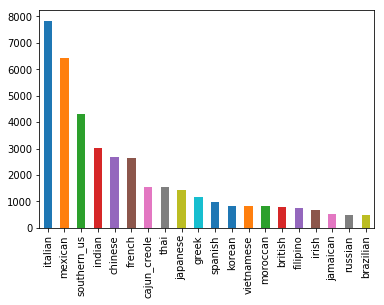

In [82]:
train_data_df['cuisine'].value_counts().plot(kind='bar')

In [83]:
from collections import Counter

In [84]:
# Count the number of recipes in which a unique ingredient is appearing in each cuisine
count_ingredients_cuisine = {}
for cuisine in train_data_df['cuisine'].unique():
    count_ingredients_cuisine[cuisine] = Counter()
    cuisine_indices = (train_data_df['cuisine'] == cuisine)
    for ingredients in train_data_df[cuisine_indices]['ingredients']:
        count_ingredients_cuisine[cuisine].update(ingredients)

In [85]:
# The 15 most common ingredients in indian cuisine
count_ingredients_cuisine['indian'].most_common(15)

[('salt', 1934),
 ('onions', 1195),
 ('garam masala', 862),
 ('water', 820),
 ('ground turmeric', 728),
 ('garlic', 726),
 ('cumin seed', 697),
 ('ground cumin', 683),
 ('vegetable oil', 593),
 ('oil', 546),
 ('ginger', 526),
 ('tomatoes', 521),
 ('tumeric', 492),
 ('chili powder', 485),
 ('green chilies', 484)]

In [86]:
# Create a dataframe of top 15 ingredients
top15 = pd.DataFrame([[item[0] for item in count_ingredients_cuisine[cuisine].most_common(15)] 
                      for cuisine in count_ingredients_cuisine], 
                    index=[cuisine for cuisine in count_ingredients_cuisine], 
                    columns=['top{}'.format(i) for i in range(1, 16)])
top15.head()

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,top11,top12,top13,top14,top15
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper,feta cheese,cucumber,purple onion,onions,lemon juice
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk,eggs,pepper,onions,ground black pepper,vanilla extract
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper,fish sauce,bay leaves,vegetable oil,eggs,cooking oil
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil,ginger,tomatoes,tumeric,chili powder,green chilies
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves,vegetable oil,ground black pepper,sugar,ground cinnamon,brown sugar


## Preprocessing

In [87]:
# Create a column in the dataframe which combines the ingredients to a string
train_data_df['string_ingredients'] = train_data_df['ingredients'].map(';'.join)
train_data_df.head()

,cuisine,id,ingredients,string_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


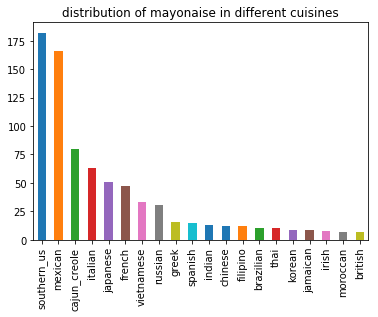

In [88]:
# Distribution of an ingredient(mayonaise) in different cuisines
indices_mayonaise = train_data_df['string_ingredients'].str.contains('mayonaise')
train_data_df[indices_mayonaise]['cuisine'].value_counts().plot(kind='bar', title='distribution of mayonaise in different cuisines')

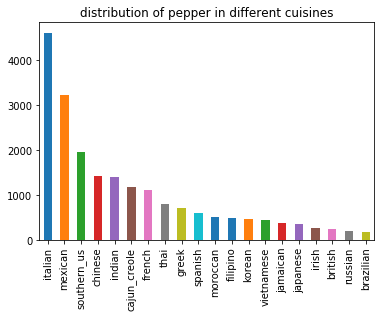

In [89]:
# Distribution of an ingredient(pepper) in different cuisines
indices_pepper = train_data_df['string_ingredients'].str.contains('pepper')
train_data_df[indices_pepper]['cuisine'].value_counts().plot(kind='bar', title='distribution of pepper in different cuisines')

The number of recipes in different cuisines are different. So, it is better to plot the relative frequencies. The relative frequency can be calculated by dividing by the total number of recipes in that cuisine

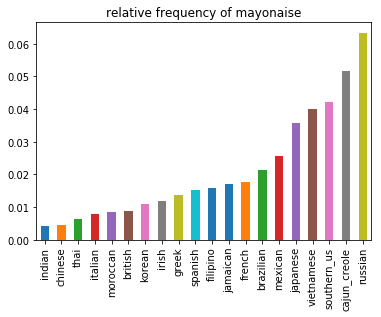

In [90]:
relative_frequency_mayo = (train_data_df[indices_mayonaise]['cuisine'].value_counts() / 
                          train_data_df['cuisine'].value_counts())
relative_frequency_mayo.sort_values(inplace=True)
relative_frequency_mayo.plot(kind='bar', title='relative frequency of mayonaise')

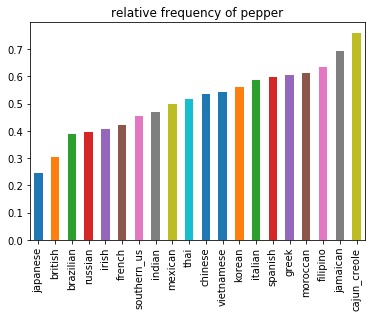

In [91]:
relative_frequency_pepper = (train_data_df[indices_pepper]['cuisine'].value_counts() / 
                            train_data_df['cuisine'].value_counts())
relative_frequency_pepper.sort_values(inplace=True)
relative_frequency_pepper.plot(kind='bar', title='relative frequency of pepper')

In [92]:
import numpy as np

In [93]:
# Unique ingredients in the top 15
unique = np.unique(top15.values.ravel())
unique

array(['Gochujang base', 'all-purpose flour', 'avocado', 'baking powder',
       'baking soda', 'bay leaves', 'beansprouts', 'black pepper',
       'brown sugar', 'butter', 'buttermilk', 'cachaca',
       'cajun seasoning', 'carrots', 'cayenne pepper', 'celery',
       'chili powder', 'chopped cilantro fresh', 'coconut milk',
       'cooking oil', 'corn starch', 'corn tortillas', 'couscous',
       'cucumber', 'cumin seed', 'dried oregano', 'dried thyme',
       'dry white wine', 'eggs', 'extra-virgin olive oil', 'feta cheese',
       'feta cheese crumbles', 'fish sauce', 'flour', 'fresh basil',
       'fresh ginger', 'fresh lemon juice', 'fresh lime juice',
       'fresh parsley', 'garam masala', 'garlic', 'garlic cloves',
       'ginger', 'grated parmesan cheese', 'green bell pepper',
       'green chilies', 'green onions', 'ground allspice',
       'ground black pepper', 'ground cinnamon', 'ground coriander',
       'ground cumin', 'ground ginger', 'ground turmeric', 'heavy cream',


In [94]:
len(unique)

90

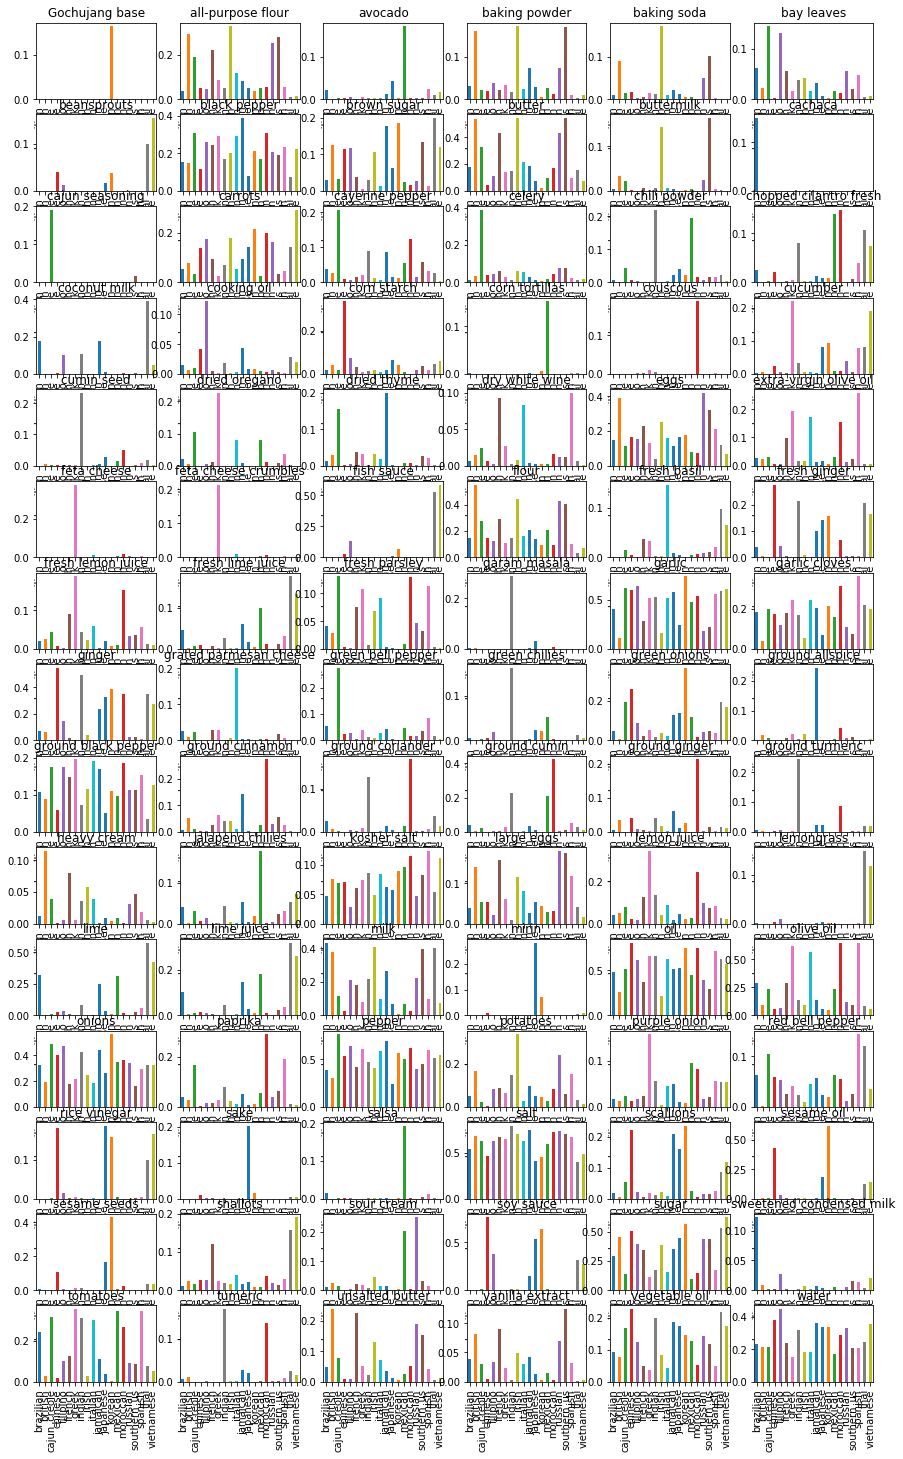

In [95]:
# A subplot of the distribution of the most common uniques in different cuisines
fig, axes = plt.subplots(15, 6, figsize=(15,25))
for ingredient, ax_index in zip(unique, range(90)):
    indices = train_data_df['string_ingredients'].str.contains(ingredient)
    relative_freq = (train_data_df[indices]['cuisine'].value_counts() / 
                    train_data_df['cuisine'].value_counts())
    relative_freq.plot(kind='bar', ax=axes.ravel()[ax_index], title=ingredient)

Some of the distinguishing ingredients can be found out from the plot.
For example, garam masala is mostly used in indian recipes. Salsa is mostly used in mexican recipes. Ground allspice is used in jamaican recipes.

## Training an SVM classifier

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

In [139]:
vectorizer = CountVectorizer() # token_pattern='[a-zA-Z]+\s*[a-zA-Z]+'
X = vectorizer.fit_transform(train_data_df['string_ingredients'].values)

In [98]:
X.shape

(39774, 3010)

It can be seen that there are 39774 recipes and 3010 ingredients are retained in the vocabulary 

In [99]:
print(list(vectorizer.vocabulary_.keys())[2990:])

['tonic', 'chartreuse', 'aloe', 'honeysuckle', 'cumberland', 'colman', 'manouri', 'ribeye', 'riblets', 'conchiglie', 'makers', 'mark', 'ketjap', 'daiya', 'slim', 'cotto', 'challenge', 'brew', 'lop', 'chong']


Each feature gets assigned a column number in the vectorizer and the value of the column can be 1 or 0 depending on whether the feature is present or not present in the recipe.

In [100]:
from sklearn.preprocessing import LabelEncoder

In [101]:
# Encode the labels that represent the cuisine of each recipe
encoder = LabelEncoder()
y = encoder.fit_transform(train_data_df.cuisine)

In [102]:
y.shape

(39774,)

In [103]:
y[:100]

array([ 6, 16,  4,  7,  7, 10, 17,  9, 13,  9,  9,  3,  9, 13,  9,  7,  1,
        9, 18, 19, 18, 13, 16,  3,  9,  3,  2,  9,  3, 13,  9,  2, 13, 18,
        9,  2,  9,  4, 16, 16,  9,  0, 13,  7, 13,  3,  5, 16, 16, 16, 11,
       16,  9, 16,  9, 10, 11,  7,  9,  8, 18, 18,  7, 10,  9, 18, 12,  5,
        5, 16, 17,  7, 14,  9,  9, 14, 14, 19, 11, 13,  2, 16,  5,  7,  7,
        9,  9,  7, 12, 17,  9, 16, 16,  6, 13, 13, 16,  7,  9,  9])

In [104]:
encoder.classes_

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [105]:
len(encoder.classes_)

20

Verifying the classes. There are 20 classes

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [108]:
# Training a simple SVM classifier
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [109]:
# Making prediction
y_pred = svm_classifier.predict(X_test)

## Evaluating the model

In [110]:
svm_classifier.score(X_test, y_test)

0.7670647391577624

An accuracy of 77%

In [111]:
from sklearn.metrics import confusion_matrix, classification_report

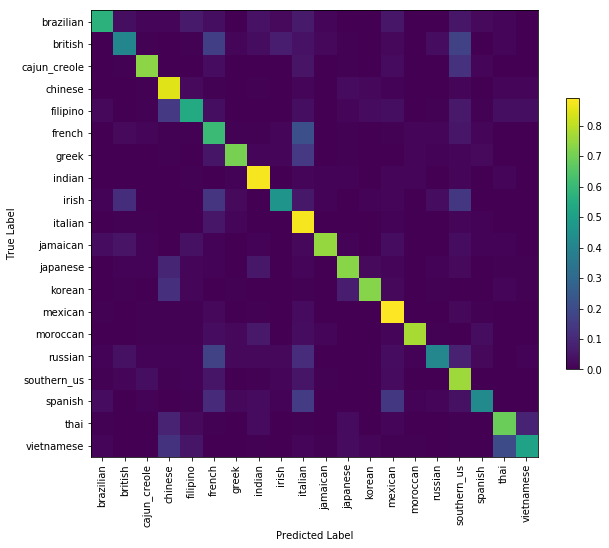

In [112]:
# Confusion matrix
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalised, interpolation='nearest')
plt.colorbar(shrink=0.5)
cuisines = encoder.classes_
tick_marks = np.arange(len(encoder.classes_))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.grid(False)

In [113]:
# Classification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.61      0.57      0.59        94
          1       0.49      0.41      0.45       162
          2       0.78      0.74      0.76       305
          3       0.77      0.85      0.81       544
          4       0.53      0.54      0.54       149
          5       0.53      0.61      0.57       528
          6       0.77      0.71      0.74       232
          7       0.88      0.88      0.88       609
          8       0.58      0.46      0.51       139
          9       0.80      0.88      0.84      1568
         10       0.77      0.75      0.76       104
         11       0.77      0.73      0.75       281
         12       0.78      0.73      0.75       148
         13       0.90      0.89      0.90      1289
         14       0.82      0.78      0.80       161
         15       0.54      0.41      0.47        97
         16       0.75      0.76      0.75       875
         17       0.63      0.43      0.51   

## Training a Kernel SVM classifier 

### 1. Polynomial Kernel

In [114]:
svm_classifier = SVC(kernel='poly', degree=8)
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [115]:
svm_classifier.score(X_test, y_test)

0.19710873664362036

### 2. Gaussian Kernel

In [116]:
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
svm_classifier.score(X_test, y_test)

0.5465744814582024

### 3. Sigmoid kernel

In [118]:
svm_classifier = SVC(kernel='sigmoid')
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [119]:
svm_classifier.score(X_test, y_test)

0.5014456316781898

## Training a logistic regression classifier

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
lrc_classifier = LogisticRegression()
lrc_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
lrc_classifier.score(X_test, y_test)

0.7870521684475172

In [129]:
y_pred = lrc_classifier.predict(X_test)

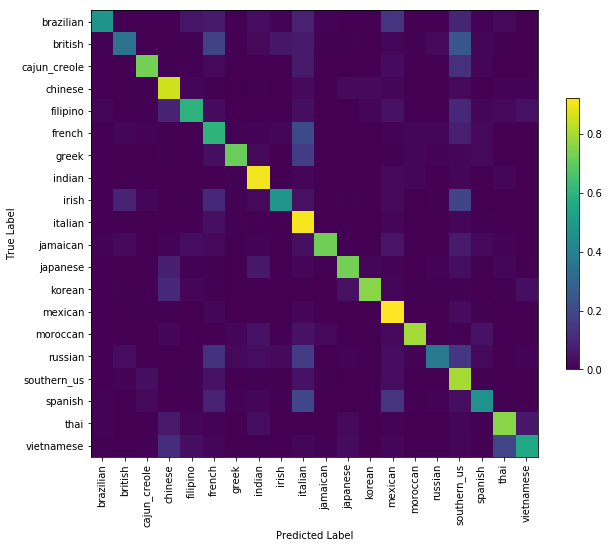

In [130]:
# Confusion matrix
plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm_normalised, interpolation='nearest')
plt.colorbar(shrink=0.5)
cuisines = encoder.classes_
tick_marks = np.arange(len(encoder.classes_))
plt.xticks(tick_marks, cuisines, rotation=90)
plt.yticks(tick_marks, cuisines)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.grid(False)

In [131]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.48      0.59        94
          1       0.57      0.35      0.43       162
          2       0.81      0.73      0.77       305
          3       0.81      0.86      0.84       544
          4       0.69      0.60      0.64       149
          5       0.58      0.60      0.59       528
          6       0.87      0.71      0.78       232
          7       0.89      0.90      0.90       609
          8       0.71      0.48      0.58       139
          9       0.80      0.91      0.85      1568
         10       0.83      0.72      0.77       104
         11       0.85      0.73      0.79       281
         12       0.84      0.76      0.79       148
         13       0.88      0.92      0.90      1289
         14       0.85      0.80      0.82       161
         15       0.61      0.37      0.46        97
         16       0.70      0.80      0.74       875
         17       0.62      0.47      0.53   

## Making predictions on the label free test set

In [163]:
test_data_df = pd.read_json('test.json')

In [164]:
test_data_df.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [165]:
test_data_df['string_ingredients'] = test_data_df['ingredients'].map(';'.join)
test_data_df.head()

,id,ingredients,string_ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",baking powder;eggs;all-purpose flour;raisins;m...
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",sugar;egg yolks;corn starch;cream of tartar;ba...
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",sausage links;fennel bulb;fronds;olive oil;cub...
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",meat cuts;file powder;smoked sausage;okra;shri...
4,35687,"[ground black pepper, salt, sausage casings, l...",ground black pepper;salt;sausage casings;leeks...


In [166]:
X_test_final = vectorizer.transform(test_data_df['string_ingredients'].values)
X_test_final.shape

(9944, 3010)

In [167]:
y_pred_final = lrc_classifier.predict(X_test_final)

In [168]:
test_data_df['cuisine'] = encoder.inverse_transform(y_pred_final)

/home/neeraj/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [169]:
test_data_df.head()

,id,ingredients,string_ingredients,cuisine
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",baking powder;eggs;all-purpose flour;raisins;m...,british
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",sugar;egg yolks;corn starch;cream of tartar;ba...,southern_us
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",sausage links;fennel bulb;fronds;olive oil;cub...,italian
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",meat cuts;file powder;smoked sausage;okra;shri...,cajun_creole
4,35687,"[ground black pepper, salt, sausage casings, l...",ground black pepper;salt;sausage casings;leeks...,italian


In [170]:
del test_data_df['string_ingredients']
del test_data_df['ingredients']

In [171]:
test_data_df.head()

,id,cuisine
0,18009,british
1,28583,southern_us
2,41580,italian
3,29752,cajun_creole
4,35687,italian


In [176]:
test_data_df.to_csv('final.csv', index=False)